# 02. Creating a bar graph

In [1]:
import $ivy.`org.apache.spark::spark-sql:3.0.1`
import $ivy.`org.plotly-scala::plotly-almond:0.8.0`

import $ivy.$                                  

import $ivy.$                                      

In [19]:
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._
import org.apache.spark.sql._
import org.apache.spark.sql.types._
import scala.collection.mutable.LinkedHashMap
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)
repl.pprinter() = repl.pprinter().copy(defaultHeight = 1)

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import org.apache.spark.sql._

import org.apache.spark.sql.types._

import scala.collection.mutable.LinkedHashMap

import org.apache.log4j.{Level, Logger}


[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/analyzing-one-categorical-variable/v/creating-bar-charts-1?modal=1)

![Creating a bar graph fig 1](./imgs/01-02-01.png)

In [4]:
val spark = {
  NotebookSparkSession.builder.appName("statistics").master("local").getOrCreate()
}

Loading spark-stubs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@54dcc95b

In [5]:
import spark.implicits._

import spark.implicits._

In [21]:
val dataset = LinkedHashMap(
    "Favorite course" -> Seq("Language", "History", "Geometry", "Chemistry", "Physics"),
    "number of teachers" -> Seq(7, 3, 9, 1, 0)
)

dataset: LinkedHashMap[String, Seq[Any]] = ...

In [22]:
val sdf = dataset.values.transpose.toList.map({case List(j: String, k:Int) => (j, k)}).toDF(dataset.keys.toList:_*)
sdf.show()

+---------------+------------------+
|Favorite course|number of teachers|
+---------------+------------------+
|       Language|                 7|
|        History|                 3|
|       Geometry|                 9|
|      Chemistry|                 1|
|        Physics|                 0|
+---------------+------------------+



sdf: DataFrame = [Favorite course: string, number of teachers: int]

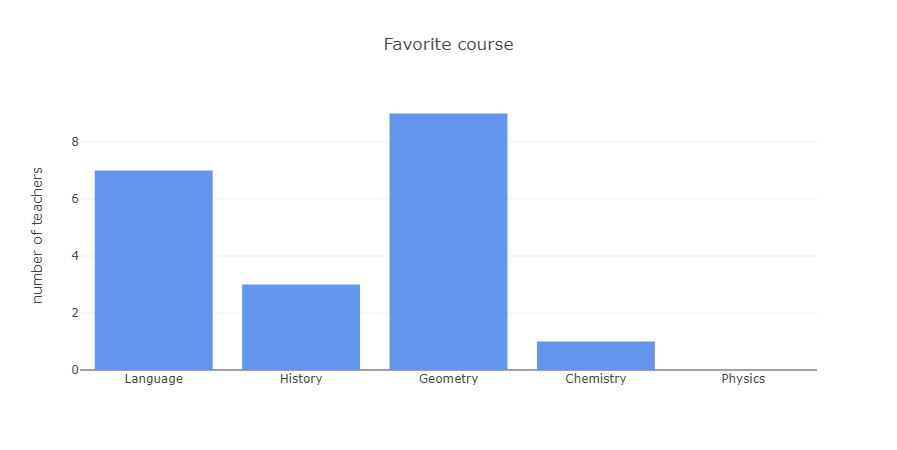

data: Seq[Bar] = ...
layout: Layout = ...
res33_2: String = "plot-a5931a5d-0d7b-41ce-9324-d459070663bc"

In [34]:
val data = Seq(Bar(
    sdf.select("Favorite course").collect().map(_(0).asInstanceOf[String]).toSeq,
    sdf.select("number of teachers").collect().map(_(0).asInstanceOf[Int]).toSeq,
    marker = Marker(color = Color.RGB(100,149,237))
))
val layout = Layout(
    title="Favorite course",  
    yaxis=Axis(title="number of teachers"),
)

plot(data, layout)